In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 9, 6
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%run autoencoder.py 64 2 0.25 --uneven --model_type gru --sigma 1e-9 --sim_type autoencoder/even/noise0 --embedding 6

Using TensorFlow backend.


[]
/Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/autoencoder/even/noise0/gru_064_x2_2m03_drop25_emb6
Loading /Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/autoencoder/even/noise0/gru_064_x2_2m03_drop25_emb6/weights.h5...


In [4]:
import sample_data
sample_data.periodic?

In [14]:
%%time
encode = K.function([model.layers[0].input], [model.layers[2].output])
encoding = encode([X[:20000]])[0]

CPU times: user 1min 40s, sys: 32.2 s, total: 2min 12s
Wall time: 32.1 s


In [6]:
np.corrcoef(encoding, Y[:encoding.shape[0]], rowvar=0)[:6, 6:]

array([[-0.06557108,  0.10351664, -0.06045425, -0.4208261 ],
       [ 0.12233208,  0.43179749, -0.14932753,  0.47996783],
       [ 0.02759682, -0.06846676, -0.14093077,  0.20930399],
       [ 0.10802068,  0.12197689,  0.04745192, -0.94756   ],
       [-0.03111771, -0.09213045, -0.06991579, -0.92841931],
       [-0.20172748,  0.11509533,  0.43595824,  0.17929184]])

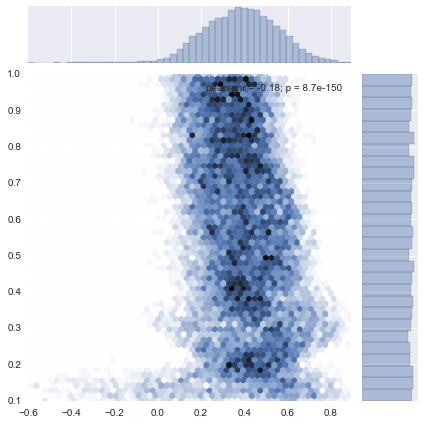

In [15]:
sns.jointplot(encoding[:, 5], Y[:encoding.shape[0], 0], kind='hex')

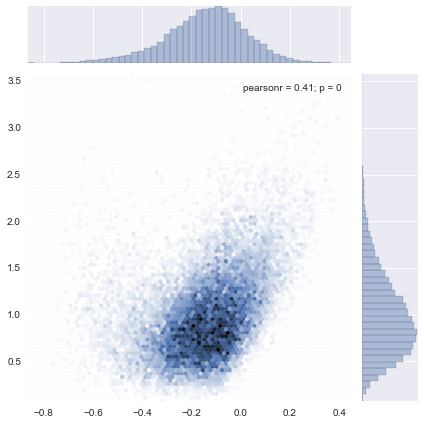

In [16]:
sns.jointplot(encoding[:, 1], Y[:encoding.shape[0], 1], kind='hex')

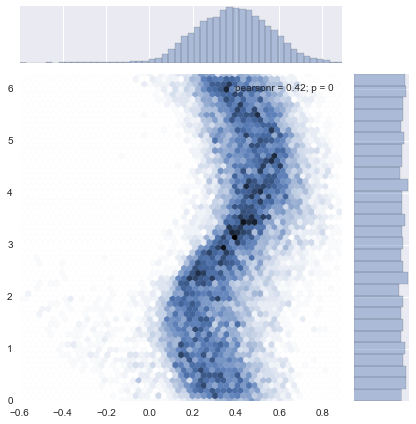

In [17]:
sns.jointplot(encoding[:, 5], Y[:encoding.shape[0], 2], kind='hex')

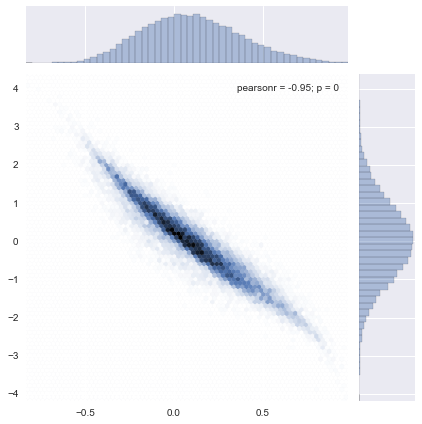

In [18]:
sns.jointplot(encoding[:, 3], Y[:encoding.shape[0], 3], kind='hex')